<a href="https://colab.research.google.com/github/jongeunShin95/hanghae99/blob/main/1%EC%A3%BC%EC%B0%A8_%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:05<00:00, 30.7MB/s]


In [3]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [4]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [6]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


sgdmodel = Model(32 * 32 * 3, 1024)
adammodel = Model(32 * 32 * 3, 1024)

In [7]:
from torch.optim import SGD
from torch.optim import Adam

lr = 0.001
sgdmodel = sgdmodel.to('cuda')
adammodel = adammodel.to('cuda')

sgdoptimizer = SGD(sgdmodel.parameters(), lr=lr)
adamoptimzer = Adam(adammodel.parameters(), lr=lr)

In [8]:
n_epochs = 50

sgdtrain_accs = []
adamtrain_accs = []

# SGD opt
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    sgdmodel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = sgdmodel(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    sgdoptimizer.step()

    total_loss += loss.item()
  sgdtrain_accs.append(accuracy(sgdmodel, trainloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")


# Adam opt
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    adammodel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = adammodel(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    adamoptimzer.step()

    total_loss += loss.item()
  adamtrain_accs.append(accuracy(adammodel, trainloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 450.23802947998047
Epoch   1 | Loss: 448.0738298892975
Epoch   2 | Loss: 446.2895185947418
Epoch   3 | Loss: 444.5851249694824
Epoch   4 | Loss: 442.83265495300293
Epoch   5 | Loss: 440.9411196708679
Epoch   6 | Loss: 438.9311366081238
Epoch   7 | Loss: 436.717725276947
Epoch   8 | Loss: 434.2846202850342
Epoch   9 | Loss: 431.68019437789917
Epoch  10 | Loss: 428.9258267879486
Epoch  11 | Loss: 426.06865215301514
Epoch  12 | Loss: 423.1888196468353
Epoch  13 | Loss: 420.3323197364807
Epoch  14 | Loss: 417.5180208683014
Epoch  15 | Loss: 414.78496837615967
Epoch  16 | Loss: 412.1625397205353
Epoch  17 | Loss: 409.76158833503723
Epoch  18 | Loss: 407.3983118534088
Epoch  19 | Loss: 405.3046429157257
Epoch  20 | Loss: 403.21729588508606
Epoch  21 | Loss: 401.3147072792053
Epoch  22 | Loss: 399.4864743947983
Epoch  23 | Loss: 397.72694873809814
Epoch  24 | Loss: 396.06285417079926
Epoch  25 | Loss: 394.4294857978821
Epoch  26 | Loss: 392.93456745147705
Epoch  27 | Loss: 3

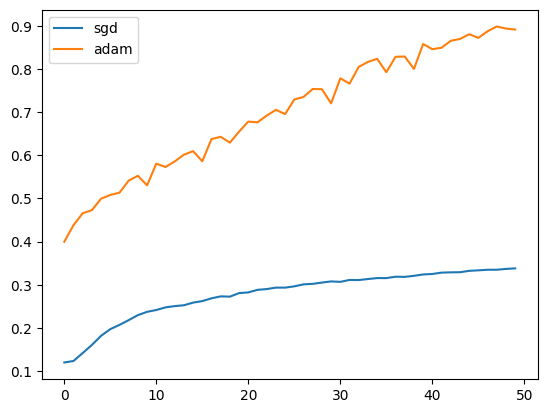

In [9]:
plot_acc(sgdtrain_accs, adamtrain_accs, 'sgd', 'adam')

In [10]:
class LeakyReLUModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

class SigmoidUModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x




leakyrelumodel = LeakyReLUModel(32 * 32 * 3, 1024)
sigmoidModel = SigmoidUModel(32 * 32 * 3, 1024)

In [11]:
leakyrelumodel = leakyrelumodel.to('cuda')
sigmoidModel = sigmoidModel.to('cuda')

leakyreluoptimizer = Adam(leakyrelumodel.parameters(), lr=lr)
sigmoidoptimzer = Adam(sigmoidModel.parameters(), lr=lr)

In [12]:
n_epochs = 50

leakyReLUtrain_accs = []
sigmoidtrain_accs = []

# LeakyReLU
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    leakyrelumodel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = leakyrelumodel(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    leakyreluoptimizer.step()

    total_loss += loss.item()
  leakyReLUtrain_accs.append(accuracy(leakyrelumodel, trainloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")


# Sigmoid
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    sigmoidModel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = sigmoidModel(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    sigmoidoptimzer.step()

    total_loss += loss.item()
  sigmoidtrain_accs.append(accuracy(sigmoidModel, trainloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 368.3322523832321
Epoch   1 | Loss: 324.118834733963
Epoch   2 | Loss: 306.3224687576294
Epoch   3 | Loss: 295.41724371910095
Epoch   4 | Loss: 287.3015789985657
Epoch   5 | Loss: 277.7777909040451
Epoch   6 | Loss: 272.12695944309235
Epoch   7 | Loss: 266.1902594566345
Epoch   8 | Loss: 259.7087483406067
Epoch   9 | Loss: 254.80710005760193
Epoch  10 | Loss: 249.04181838035583
Epoch  11 | Loss: 244.74423396587372
Epoch  12 | Loss: 237.46529626846313
Epoch  13 | Loss: 232.20186960697174
Epoch  14 | Loss: 226.62598150968552
Epoch  15 | Loss: 222.7493997812271
Epoch  16 | Loss: 217.30629736185074
Epoch  17 | Loss: 211.96906501054764
Epoch  18 | Loss: 208.8720983862877
Epoch  19 | Loss: 202.37105357646942
Epoch  20 | Loss: 197.5982909798622
Epoch  21 | Loss: 192.70792734622955
Epoch  22 | Loss: 189.26892393827438
Epoch  23 | Loss: 182.83078479766846
Epoch  24 | Loss: 176.75171613693237
Epoch  25 | Loss: 172.85811614990234
Epoch  26 | Loss: 166.63768863677979
Epoch  27 | 

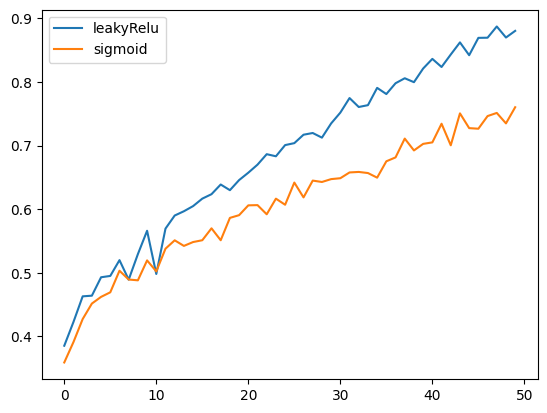

In [13]:
plot_acc(leakyReLUtrain_accs, sigmoidtrain_accs, 'leakyRelu', 'sigmoid')

In [14]:
class DropoutModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.layer3(x))

    return x

dropoutModel = DropoutModel(32 * 32 * 3, 1024)

In [15]:
dropoutModel = dropoutModel.to('cuda')

dropoutoptimizer = Adam(dropoutModel.parameters(), lr=lr)

Epoch   0 | Loss: 379.6277484893799
Epoch   1 | Loss: 328.3848942518234
Epoch   2 | Loss: 308.7738163471222
Epoch   3 | Loss: 295.8542892932892
Epoch   4 | Loss: 285.8283277750015
Epoch   5 | Loss: 278.997150182724
Epoch   6 | Loss: 271.1956344842911
Epoch   7 | Loss: 264.05309081077576
Epoch   8 | Loss: 258.8635905981064
Epoch   9 | Loss: 253.05924832820892
Epoch  10 | Loss: 248.8149962425232
Epoch  11 | Loss: 241.5930219888687
Epoch  12 | Loss: 237.02715837955475
Epoch  13 | Loss: 232.0209692120552
Epoch  14 | Loss: 225.74402844905853
Epoch  15 | Loss: 222.29057228565216
Epoch  16 | Loss: 215.60123389959335
Epoch  17 | Loss: 212.5017949938774
Epoch  18 | Loss: 205.4201402068138
Epoch  19 | Loss: 200.54042845964432
Epoch  20 | Loss: 196.7425662279129
Epoch  21 | Loss: 191.79728543758392
Epoch  22 | Loss: 184.6527161002159
Epoch  23 | Loss: 181.36999827623367
Epoch  24 | Loss: 172.86242455244064
Epoch  25 | Loss: 170.16119092702866
Epoch  26 | Loss: 164.16819047927856
Epoch  27 | Loss:

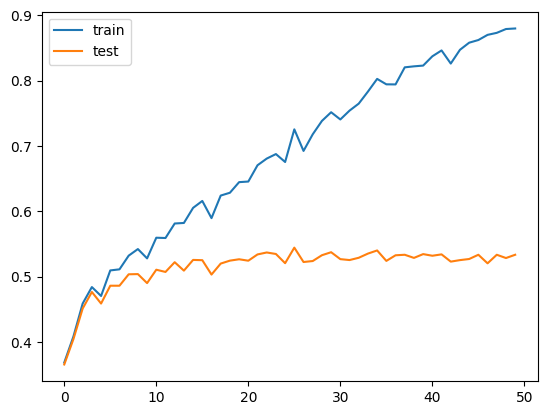

In [16]:
droupouttrain_accs = []
droupouttest_accs = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    dropoutModel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = dropoutModel(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    dropoutoptimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    dropoutModel.eval()
    droupouttrain_accs.append(accuracy(dropoutModel, trainloader))
    droupouttest_accs.append(accuracy(dropoutModel, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

plot_acc(droupouttrain_accs, droupouttest_accs)